<h1>LEARNING

In [31]:
# Import library
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [32]:
default = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')

In [33]:
default.head(10)
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [34]:
# Fitur dan target
X = default[['Income', 'Age', 'Loan','Loan to Income']]
y = default['Default']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (1600, 4)
Ukuran data uji: (400, 4)


In [35]:
# Inisialisasi model
model = LogisticRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[318  12]
 [ 15  55]]
Accuracy: 0.9325


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       330
           1       0.82      0.79      0.80        70

    accuracy                           0.93       400
   macro avg       0.89      0.87      0.88       400
weighted avg       0.93      0.93      0.93       400



AUC Score: 0.9778787878787879


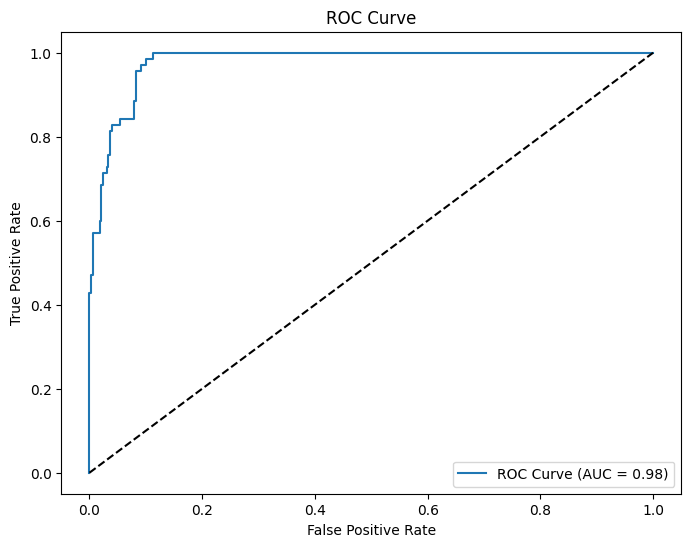

In [38]:
# Probabilitas prediksi
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1],'k--') # Garis diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()